# Kernel PCA

Problem Statement :

Apply Kernel PCA for a dataset given in the url, build a classification model and plot the graph    

Based on wine ingredients predicted customer segments, reduced
dimensions using Kernel PCA

https://drive.google.com/open?id=1I8KsCufEa47XvzrkxhntEWSy1Su0E0NY

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib')
from ipynb.fs.full.library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
import collections
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/Documents/MyDoc/data_sets/Social_Network_Ads.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Data-Pre Processing 

In [2]:
data_set.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
data_set.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
# counting number of output classes
collections.Counter(data_set['Purchased'])

Counter({0: 257, 1: 143})

In [5]:
#seperating x and y values
x_values , y_values = pre_processing_ad(data_set)

In [6]:
sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

In [7]:
#exporting classifier object after fitting data 
joblib.dump(sc_x,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_scalar_wine.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_scalar_wine.pkl']

In [8]:
#obtaining splitted training and test data set
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_values,y_values,test_size=0.2,random_state=0)

#### Applying Kernel PCA dimension reduction technique

In [9]:
# creating object of kernel pca
kpca = KernelPCA(n_components=2,kernel ='rbf')

In [10]:
train_X=kpca.fit_transform(train_X)
test_X =kpca.transform(test_X)

In [11]:
#exporting classifier object after fitting data 
joblib.dump(kpca,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_ad.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_ad.pkl']

In [12]:
print(train_X.shape)
print(test_X.shape)

(320, 2)
(80, 2)


#### Building S V C Model

In [13]:
classifier = fit_or_predict(train_X,train_Y,SVC(kernel='rbf'),1)

/home/admin3/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#exporting classifier object after fitting data 
joblib.dump(classifier,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_classifier_wine.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/k_pca_classifier_wine.pkl']

#### Predicting Outputs And Checking Accuracy

In [15]:
# predicting values of test data set and storing
test_prediction = fit_or_predict(test_X,test_Y,classifier)

# predicting values of train data set and storing
train_prediction = fit_or_predict(train_X,train_Y,classifier)

In [16]:
# checking confusion matrix  to see how many values are predicted correct and incorrect
confusion_matrix(test_prediction,test_Y)

array([[55,  2],
       [ 3, 20]])

In [17]:
# checking confusion matrix  to see how many values are predicted correct and incorrect
confusion_matrix(train_prediction,train_Y)

array([[177,   8],
       [ 22, 113]])

In [18]:
# calculating and printing accuracy score
score=accuracy_score(train_Y,train_prediction)
print("accuracy percentage  : ",score*100)

accuracy percentage  :  90.625


In [19]:
# calculating and printing accuracy score
score=accuracy_score(test_Y,test_prediction)
print("accuracy percentage  : ",score*100)

accuracy percentage  :  93.75


In [20]:
print("Classification Report Of Test Set")
print(classification_report(test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Train Set")
print(classification_report(train_prediction,train_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

Classification Report Of Test Set
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        57
           1       0.91      0.87      0.89        23

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.94      0.94      0.94        80

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Classification Report Of Train Set
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       185
           1       0.93      0.84      0.88       135

    accuracy                           0.91       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.91      0.91       320

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


#### Plotting Colormap

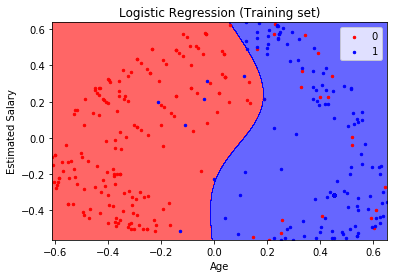

In [21]:
plot_colormap_two_classes(train_X,train_Y,"Logistic Regression (Training set)",classifier,mymap=ListedColormap(('red', 'blue')))

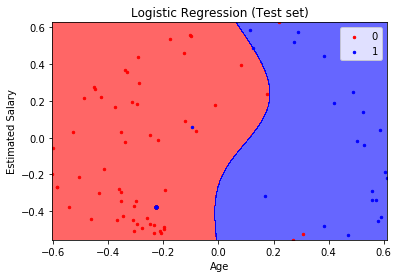

In [22]:
plot_colormap_two_classes(test_X,test_Y,"Logistic Regression (Test set)",classifier,ListedColormap(('red', 'blue')))